# Decision Trees

In [107]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert categorical variables to numerical values using LabelEncoder
le = LabelEncoder()
for col in ['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis']:
    df[col] = le.fit_transform(df[col])

# Separate features and target variable
X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']

# Create and train the decision tree classifier with the entropy criterion
#clf = DecisionTreeClassifier(criterion='entropy', random_state=42) #ID3 :Iterative Dichotomiser 3
clf = DecisionTreeClassifier(criterion='entropy', random_state=42) #CART :Classification and Regression Trees

clf = clf.fit(X, y)



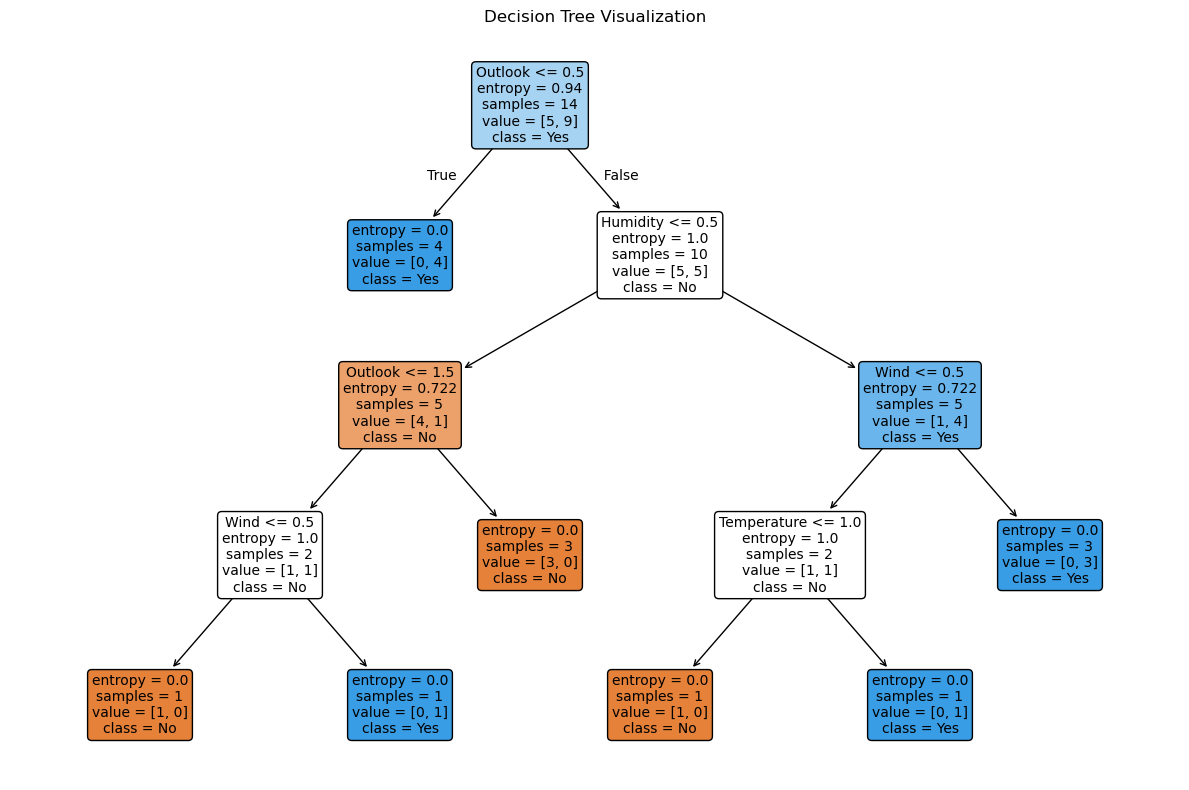

In [99]:
import matplotlib.pyplot as plt
from sklearn import tree

# Define your class names for binary classification
class_names = ['No', 'Yes']  
# Define feature names correctly as a list

feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']  

# Create the visualization
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, 
               feature_names=feature_names,  
               class_names=class_names, 
               filled=True, 
               rounded=True,
               fontsize=10)
plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()

In [119]:
y = df['PlayTennis']

In [8]:
#!pip install graphviz

In [101]:
import numpy as np

# Suppose you have a new data point (ensure it's encoded like your training data)
# For instance, if your features are [Outlook, Temperature, Humidity, Wind]
# and the encoding is known, you might have:
new_data = np.array([[0, 0, 1, 0]])  # Adjust values based on your encoding

# Predict the class
predicted_class = clf.predict(new_data)
print("Predicted class:", predicted_class)




Predicted class: [1]


C:\Users\Jiyan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print predictions and accuracy
print("Predicted labels:", y_pred)
print("True labels:     ", y_test.values)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Predicted labels: [1 0 0 1 1]
True labels:      [1 1 0 1 0]
Accuracy on test set: 0.6


In [133]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Print predictions and accuracy
print("Predicted labels:", y_pred)
print("True labels:     ", y_test.values)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))

# Compute confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Predicted labels: [1 0 0 1 1]
True labels:      [1 1 0 1 0]
Accuracy on test set: 0.6

Confusion Matrix:
[[1 1]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.50      0.50         2
         Yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



# regressor decision tree


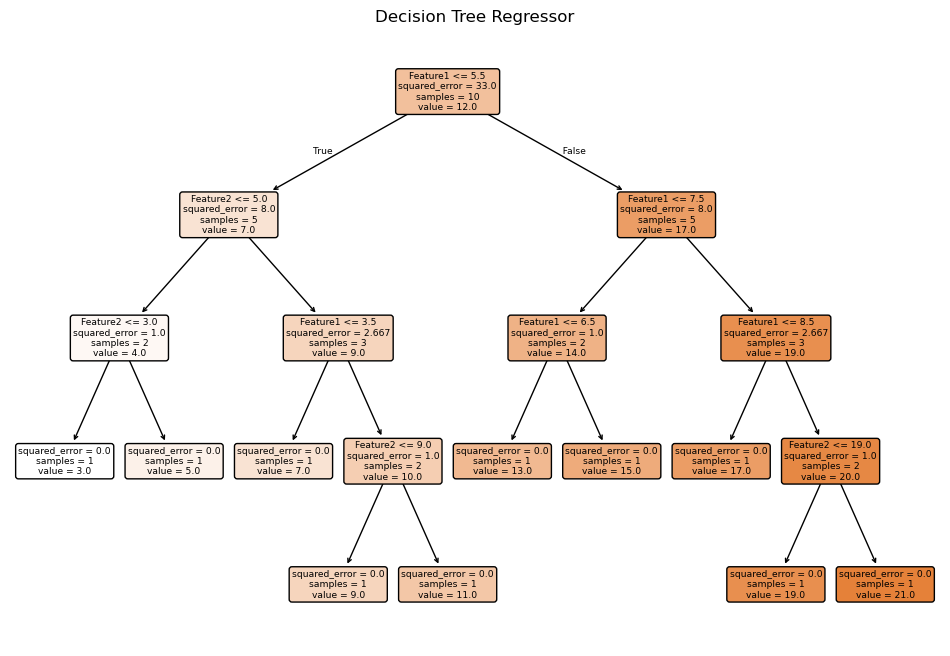

Predicted values for new data: [ 7. 15.]


C:\Users\Jiyan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [43]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Create a simple regression dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Target':   [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}

df = pd.DataFrame(data)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Create and train the decision tree regressor
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X, y)

# Visualize the decision tree regressor
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

# Test predictions on new data
new_data = [[3, 6], [7, 14]]
predictions = reg.predict(new_data)
print("Predicted values for new data:", predictions)


# multivariate regresion

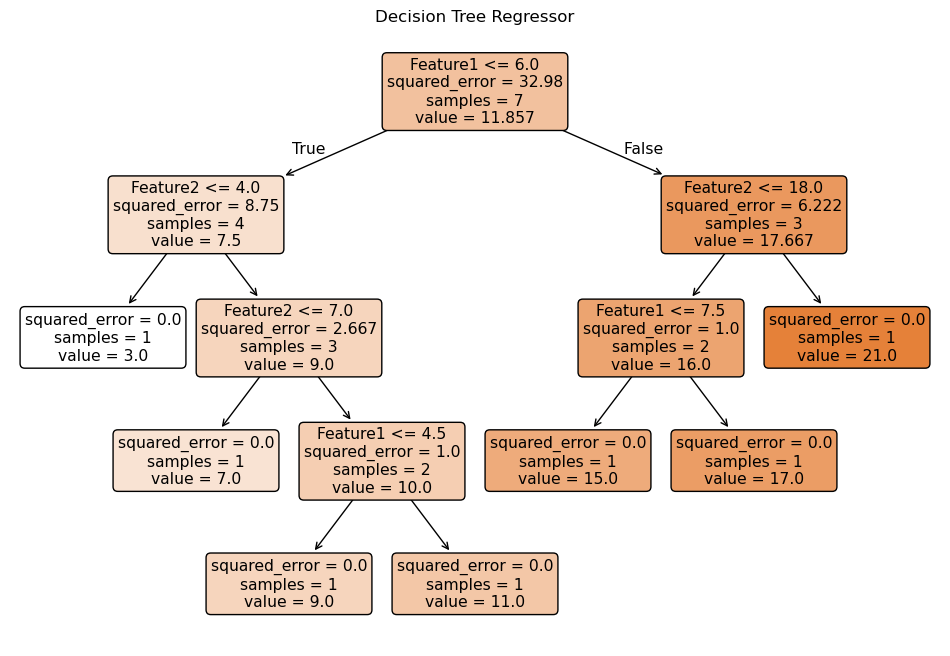

R² Score: 0.8783783783783784


In [137]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create a simple regression dataset
data = {
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'Target':   [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
}
df = pd.DataFrame(data)

# Separate features and target variable
X = df.drop('Target', axis=1)
y = df['Target']

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the decision tree regressor on the training set
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)

# Visualize the decision tree regressor
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Regressor")
plt.show()

# Predict on the test set
y_pred = reg.predict(X_test)




r2_default = reg.score(X_test, y_test)
print("R² Score:", r2_default)


In [135]:
# import pandas as pd
# from sklearn.tree import DecisionTreeRegressor, plot_tree
# import matplotlib.pyplot as plt

# # Create a synthetic multivariate regression dataset
# data = {
#     'Size':      [1500, 1800, 2400, 3000, 3500, 4000, 2500, 2700, 2900, 3100],
#     'Bedrooms':  [3, 4, 3, 5, 4, 4, 3, 3, 4, 5],
#     'Age':       [10, 15, 20, 10, 8, 12, 18, 16, 9, 7],
#     'Price':     [300, 350, 400, 450, 500, 520, 410, 430, 460, 480]  # Prices in thousands
# }

# df = pd.DataFrame(data)

# # Separate features and target variable
# X = df[['Size', 'Bedrooms', 'Age']]
# y = df['Price']

# # Create and train the decision tree regressor
# reg = DecisionTreeRegressor(random_state=42, max_depth=5)
# reg.fit(X, y)

# # Visualize the decision tree regressor
# plt.figure(figsize=(12, 8))
# plot_tree(reg, feature_names=X.columns, filled=True, rounded=True)
# plt.title("Decision Tree Regressor (Multivariate)")
# plt.show()

# # Test the model on new data (multivariate)
# new_data = [
#     [2000, 3, 12],  # A house with 2000 sq.ft., 3 bedrooms, and 12 years old
#     [3200, 4, 8]    # A house with 3200 sq.ft., 4 bedrooms, and 8 years old
# ]
# predictions = reg.predict(new_data)
# print("Predicted prices for new data (in thousands):", predictions)


In [41]:
import pandas as pd

df = pd.read_csv('~/MachineLearning/Decision Trees/data.csv')
df.head()

,X,Y,Class
0,11.971797,-7.504889,3
1,-8.277160,3.589366,2
2,6.159895,-3.174328,3
3,-8.445008,3.845746,2
4,-8.012580,2.902211,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       5000 non-null   float64
 1   Y       5000 non-null   float64
 2   Class   5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [15]:
df.describe()

,X,Y,Class
count,5000.000000,5000.000000,5000.000000
mean,-0.178067,-0.579911,1.500000
std,5.998181,4.412769,1.118146
min,-13.718486,-19.716218,0.000000
25%,-7.127540,-3.457994,0.750000
50%,0.393012,-0.002115,1.500000
75%,4.487479,3.094766,2.250000
max,21.494466,10.981597,3.000000


<Axes: xlabel='X', ylabel='Y'>

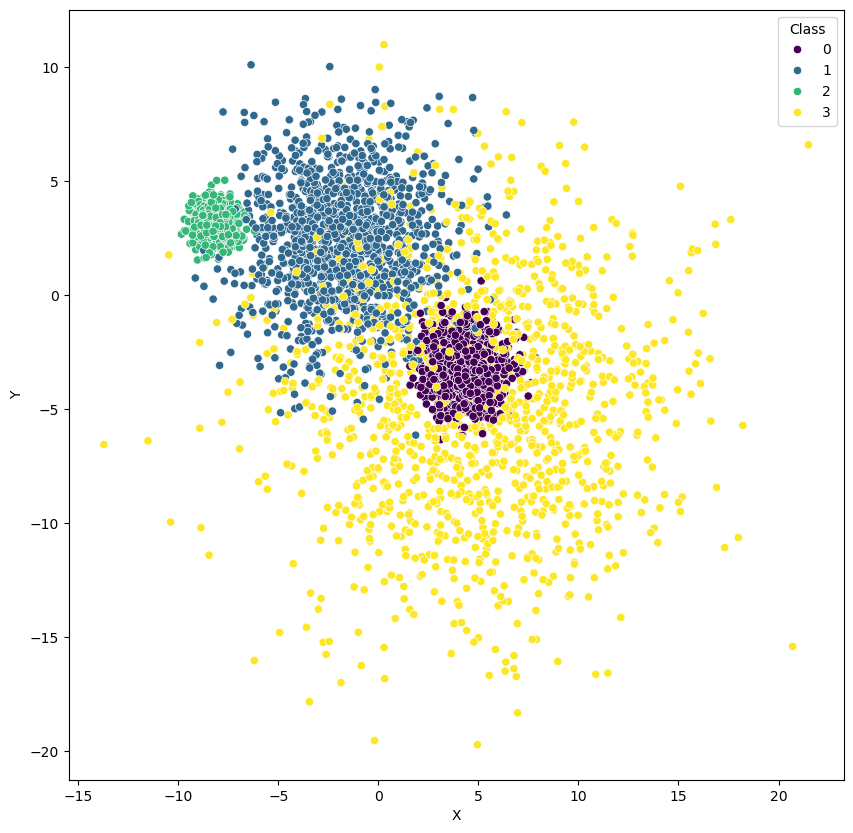

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))
sns.scatterplot(data=df, x='X', y='Y', hue='Class', palette='viridis')

# A different way of splitting, that has more control in case someone needs to perform any operation on the dataset prior to splitting.

In [45]:
import numpy as np

train, test, val = np.split(df.sample(frac=1, random_state=42), [int(.33333 * len(df)), int(.66666 * len(df))])
len(train), len(test), len(val)


C:\Users\Jiyan\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(1666, 1667, 1667)

<Axes: xlabel='X', ylabel='Y'>

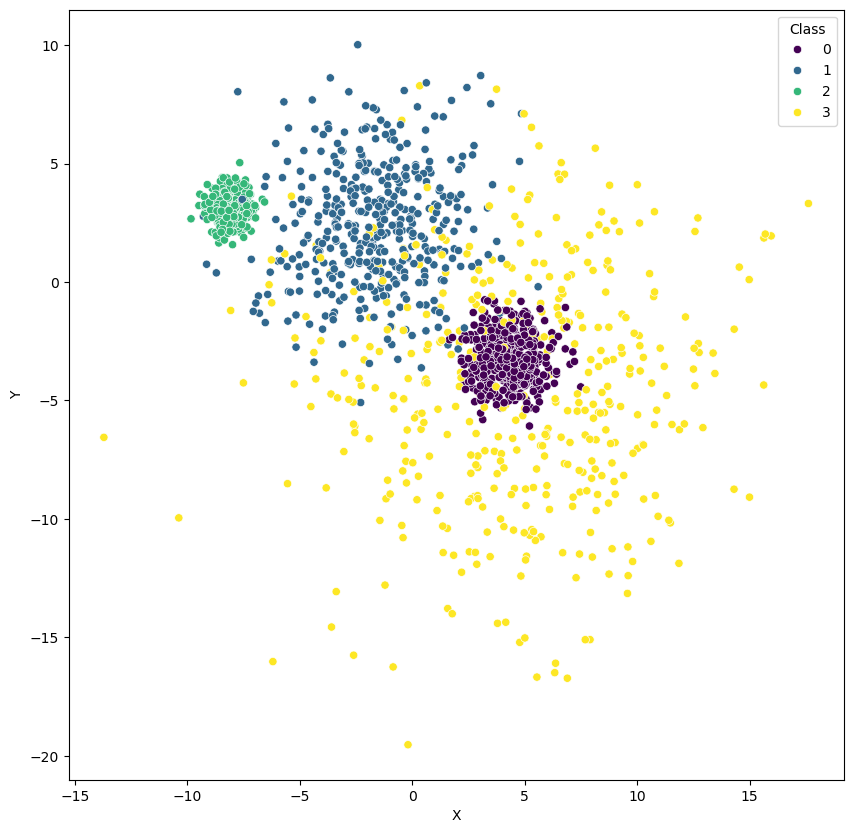

In [24]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data=train, x='X', y='Y', hue='Class', palette='viridis')

In [47]:
xTrain = train[['X', 'Y']].values
yTrain = train['Class'].values
xTest = test[['X', 'Y']].values
yTest = test['Class'].values
xVal = val[['X', 'Y']].values
yVal = val['Class'].values

print(xTrain.shape)

(1666, 2)


Best accuracy score 0.9142171565686863 achieved at max depth 5


DecisionTreeClassifier(max_depth=5)

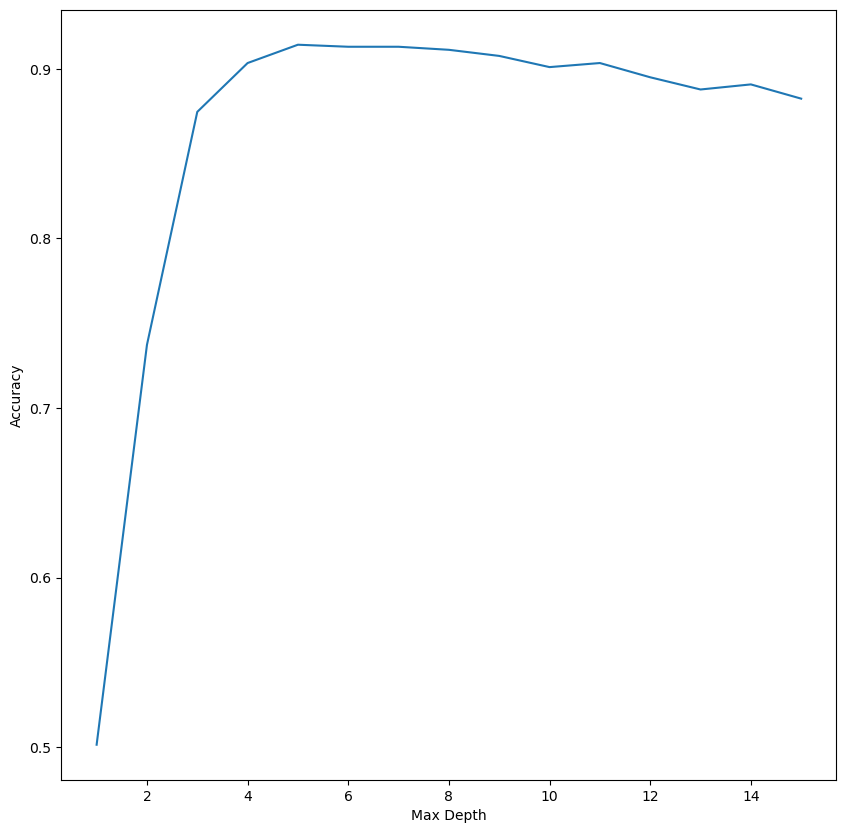

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []
max_depths = []

for max_depth in range(1, 16):
    model = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    model.fit(xTrain, yTrain)
    
    test_predictions = model.predict(xTest)
    test_accuracy = accuracy_score(yTest, test_predictions)
    
    max_depths.append(max_depth)
    accuracy_scores.append(test_accuracy)
    
plt.figure(figsize = (10, 10))
ax = sns.lineplot(x=max_depths, y=accuracy_scores)
ax.set(xlabel='Max Depth', ylabel='Accuracy')
print(f'Best accuracy score {max(accuracy_scores)} achieved at max depth {max_depths[np.argmax(accuracy_scores)]}')

dt = DecisionTreeClassifier(max_depth=max_depths[np.argmax(accuracy_scores)])
dt.fit(xTrain, yTrain)

<Figure size 1000x1000 with 0 Axes>

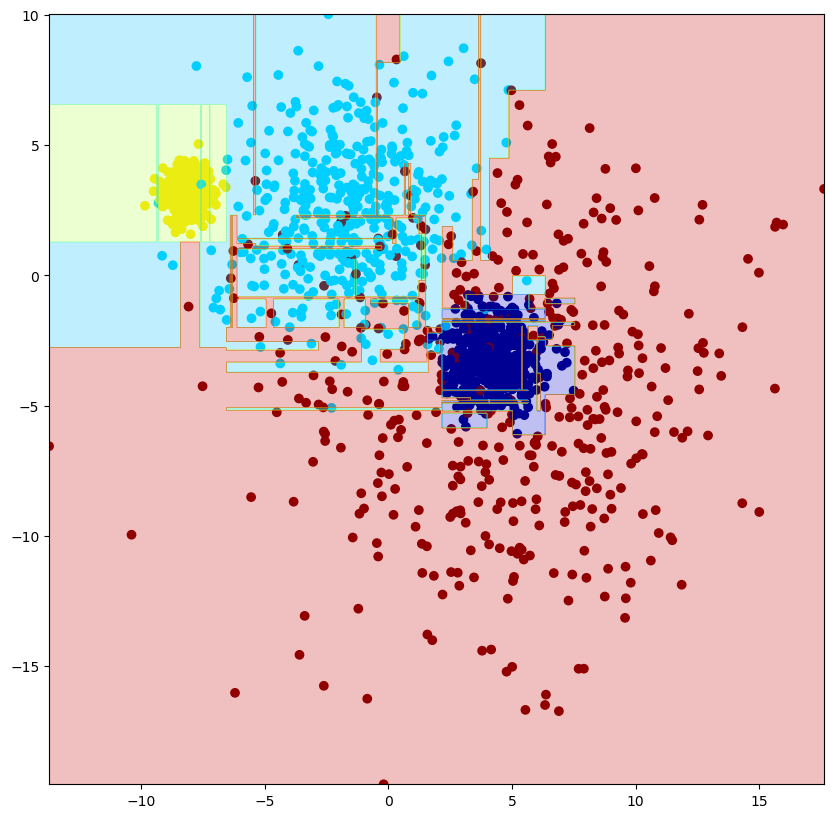

In [34]:
plt.figure(figsize = (10, 10))

fig, ax = plt.subplots(figsize = (10, 10))

ax.scatter(train['X'], train['Y'], c=yTrain, cmap='jet')

X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 1000), 
                np.linspace(train['Y'].min(), train['Y'].max(), 1000))

# ravel flattens, c_ combines into matrix
Z = model.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

ax.contourf(X, Y, Z, cmap='jet', alpha=0.25)

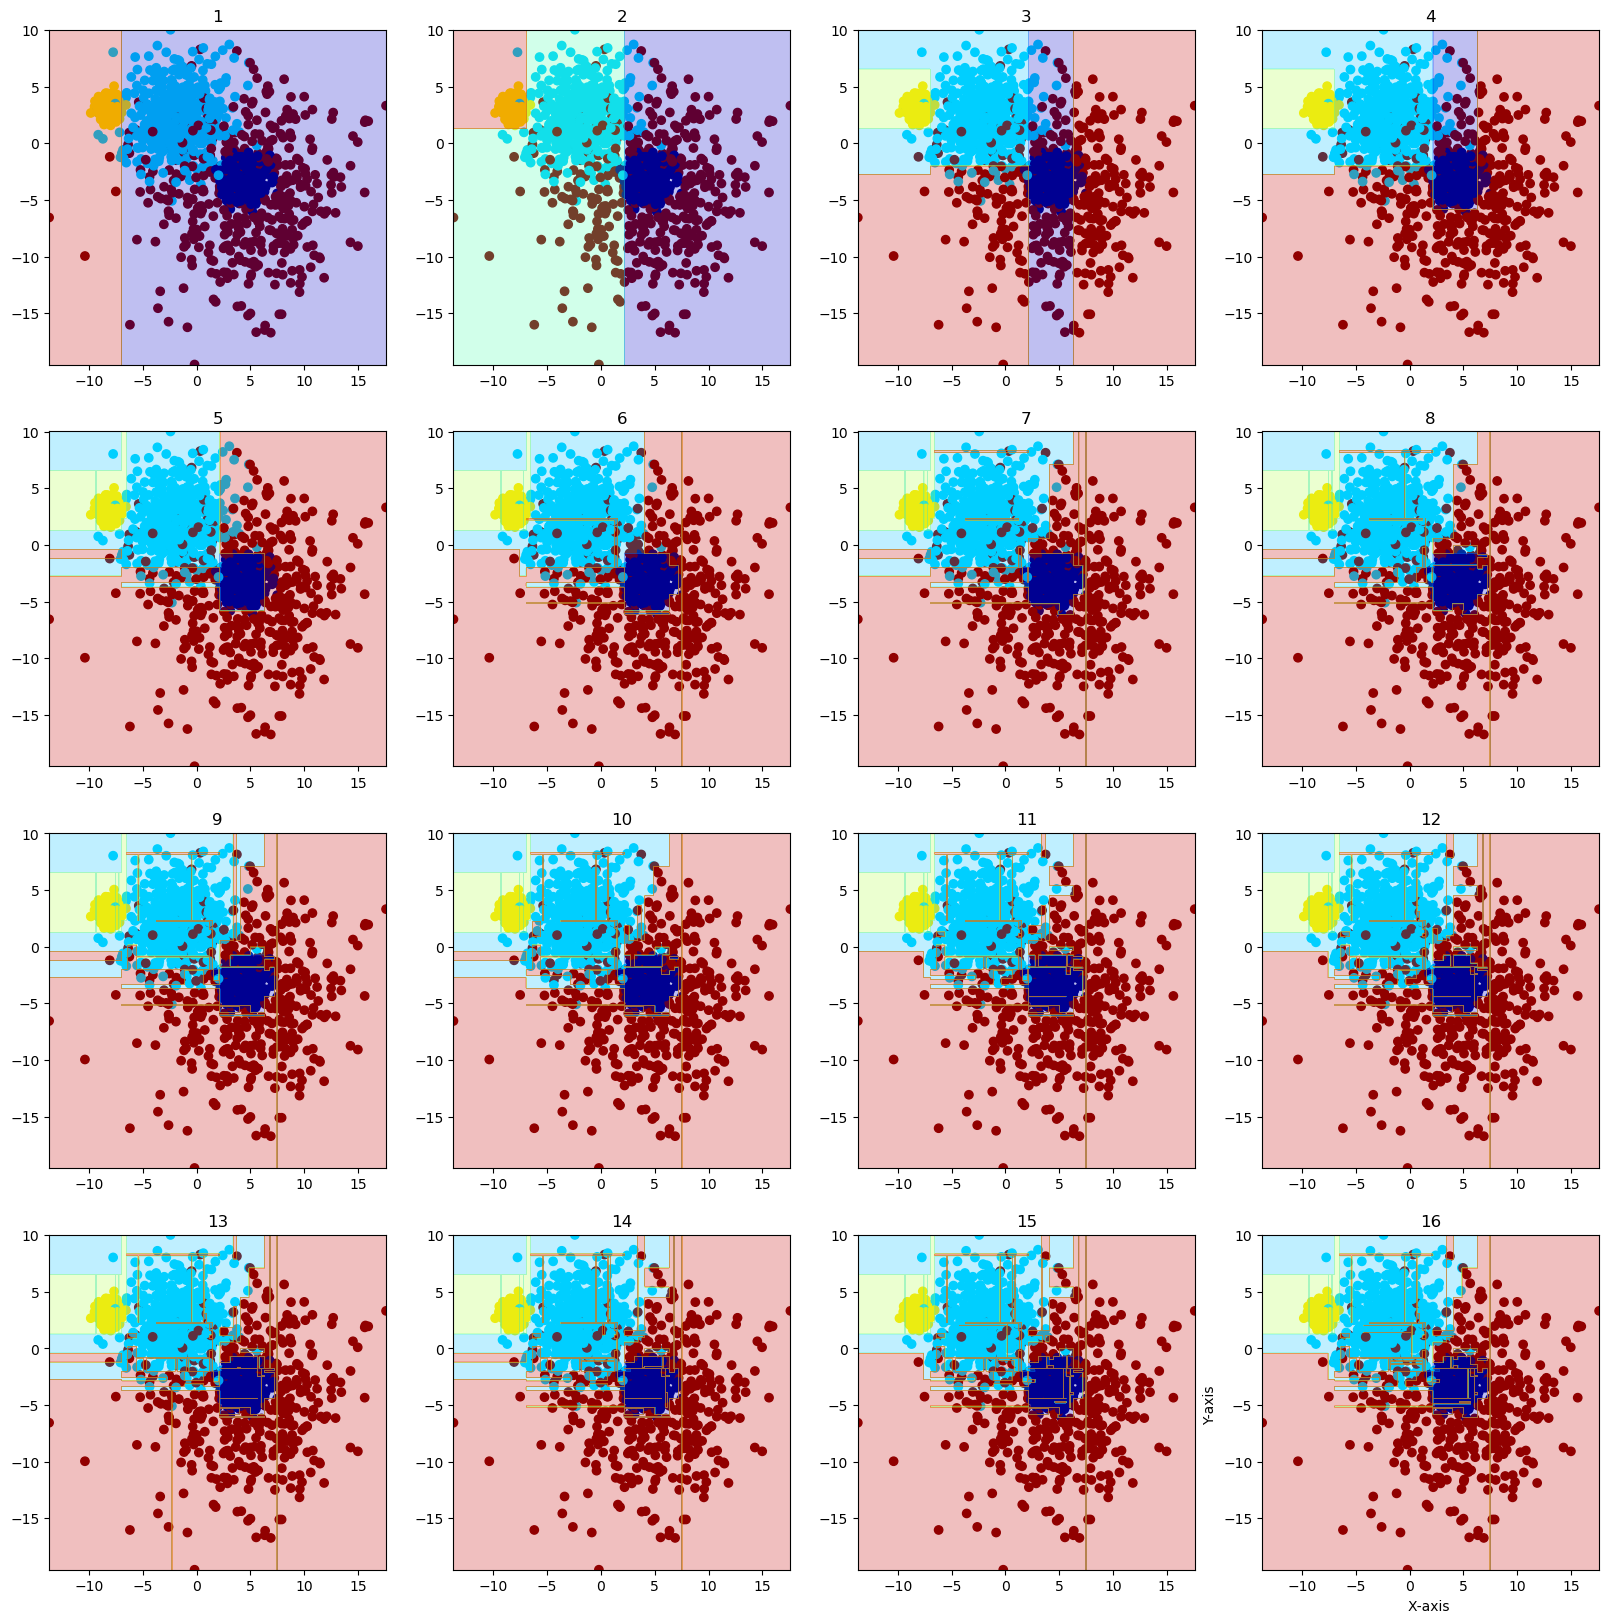

In [54]:
fig, axs = plt.subplots(4, 4, figsize = (20, 20))
for i in range (1,5):
     for j in range (1,5):
            depth=4*(i-1)+(j-1)+1
            
            model = DecisionTreeClassifier(criterion='gini',max_depth=depth)
            model.fit(xTrain, yTrain)

            axs[i-1, j-1].scatter(train['X'], train['Y'], c=yTrain, cmap='jet')

            X, Y = np.meshgrid(np.linspace(train['X'].min(), train['X'].max(), 1000), 
                np.linspace(train['Y'].min(), train['Y'].max(), 1000))

            Z = model.predict(np.c_[X.ravel(), Y.ravel()])
            Z = Z.reshape(X.shape)

            axs[i-1, j-1].contourf(X, Y, Z, cmap='jet', alpha=0.25)
            axs[i-1, j-1].set_title(depth)

            plt.xlabel('X-axis ')
            plt.ylabel('Y-axis ')

plt.show()

In [10]:
from sklearn.tree import export_text

text_representation = export_text(dt)
print(text_representation)

|--- feature_0 <= -6.97
|   |--- feature_1 <= 1.27
|   |   |--- feature_1 <= -2.75
|   |   |   |--- class: 3
|   |   |--- feature_1 >  -2.75
|   |   |   |--- feature_1 <= -0.41
|   |   |   |   |--- feature_0 <= -7.58
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_0 >  -7.58
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -0.41
|   |   |   |   |--- class: 1
|   |--- feature_1 >  1.27
|   |   |--- feature_1 <= 6.54
|   |   |   |--- feature_0 <= -9.27
|   |   |   |   |--- feature_0 <= -9.37
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  -9.37
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -9.27
|   |   |   |   |--- feature_0 <= -7.23
|   |   |   |   |   |--- feature_0 <= -7.58
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  -7.58
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  -7.23
|   |   |   |   |   |--- feature_0 <= -7.21
|   |   |   |   |   |   |--- class: 1
|   |

In [57]:
from sklearn import metrics
from sklearn import model_selection

dtPred = dt.predict(xTest)
dtProb = dt.predict_proba(xTest)

print("Accuracy:",metrics.balanced_accuracy_score(yTest, dtPred))
print("F1:", metrics.f1_score(yTest, dtPred, average='weighted'))
print("Loss:", metrics.log_loss(yTest, dtProb))
print("Cross validation:", model_selection.cross_val_score(dt, df[['X', 'Y']], df['Class']))

print(metrics.classification_report(yTest, dtPred))

Accuracy: 0.9127002809183936
F1: 0.9135883258687251
Loss: 0.6894663321142191
Cross validation: [0.915 0.911 0.919 0.908 0.907]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       386
           1       0.90      0.89      0.90       424
           2       0.99      0.99      0.99       451
           3       0.85      0.81      0.83       406

    accuracy                           0.91      1667
   macro avg       0.91      0.91      0.91      1667
weighted avg       0.91      0.91      0.91      1667



## Random Forest Algorithm

A **Random Forest** combines multiple decision trees to produce more robust predictions. Given a dataset, the Random Forest prediction is defined as follows:

### Classification Prediction

For classification tasks, the final predicted class \( \hat{y} \) is determined by majority voting:

$$
\hat{y} = \operatorname{mode}\{f_1(x), f_2(x), \dots, f_n(x)\}
$$


Where:
- \( f_i(x) \) is the prediction of the \( i^{th} \) decision tree.
- \( n \) is the total number of trees.
- \( \operatorname{mode} \) returns the most frequent predicted class.

---

### Regression Prediction

For regression tasks, the Random Forest prediction \( \hat{y} \) is the average of all tree predictions:

$$
\hat{y} = \frac{1}{n} \sum_{i=1}^{n} f_i(x)
$$




In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()

rfc.fit(xTrain, yTrain)

rfcPred = rfc.predict(xTest)
rfcProb = rfc.predict_proba(xTest)

print("Accuracy:",metrics.balanced_accuracy_score(yTest, rfcPred))
print("F1:", metrics.f1_score(yTest, rfcPred, average='weighted'))
print("Cross validation:", model_selection.cross_val_score(rfc, df[['X', 'Y']], df['Class']))

print(metrics.classification_report(yTest, rfcPred))

Accuracy: 0.911014891492762
F1: 0.9120454108553662
Cross validation: [0.915 0.909 0.917 0.918 0.908]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       386
           1       0.89      0.92      0.90       424
           2       0.99      1.00      0.99       451
           3       0.86      0.79      0.82       406

    accuracy                           0.91      1667
   macro avg       0.91      0.91      0.91      1667
weighted avg       0.91      0.91      0.91      1667



Print some of the boundaries from the trees of the random forest.